# Анализ графов в Python
Тетрадка посвящена работе с графами в питоне на примере библиотеки NetworkX.


В настоящее время наиболее насущные проблемы анализа данных связаны с отношениями, а не просто с размером таблицы дискретных данных.
Графовые технологии и анализ графов предоставляют мощные инструменты для работы со связанными данными, которые используются в исследованиях, социальных инициативах и бизнес-решениях, например:
* моделирование динамических сред от финансовых рынков до ITсервисов;
* прогнозирование распространения эпидемий болезней, а также
периодических задержек и сбоев в компьютерных сетях;
* поиск прогностических признаков для машинного обучения систем
борьбы с финансовыми преступлениями;
* выявление шаблонов поведения для персонализированного опыта
и рекомендаций.





Графовые алгоритмы являются подмножеством инструментария для анализа графов. В свою очередь, анализ графов – то, чем мы с вами занимаемся – это использование любого графового подхода для анализа связанных
данных. Мы можем использовать разные методы – извлекать данные из
графа, использовать обычную статистику, исследовать графы визуально или включать их в задачи машинного обучения. 

## Обзор NetworkX

NetworkX --- это  библиотека, предназначенная для создания, обработки и изучения сложных сетей (aka графов). В отличие от других библиотек, которые вы можете встретить в сети (igraph, graphviz etc), она полностью написана на Python, благодаря чему ставится через Anaconda и не требует предустановки других пакетов.

Материал сильно опирается на лекцию по [введению в NetworkX](https://www.cl.cam.ac.uk/~cm542/teaching/2010/stna-pdfs/stna-lecture8.pdf).

In [1]:
import networkx as nx

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

Пример создания простого графа:

In [2]:
# Создаём заготовку графа, в которую будут добавляться вершины и рёбра.
g = nx.Graph()

Добавление вершин:

In [3]:
# Вершину графа можно называть как строкой, так и числом.
g.add_node(1)
g.add_node('n')

# Добавление нескольких вершин сразу.
g.add_nodes_from([2, 3])

Добавление рёбер:

In [4]:
# Указываем две вершины, которые надо соединить.
g.add_edge(1, 'n')

# Добавление нескольких рёбер между указанными вершинами.
g.add_edges_from([(1, 2), (1, 3)])

# Добавление сразу двух вершин.
# Создаются и новые вершины, и ребро между ними!
g.add_edge('a', 'b', weight=0.1)
g.add_edge('b', 'c', weight=1.5)
g.add_edge('a', 'c', weight=1)
g.add_edge('c', 'd', weight=0.2)
g.add_edge('c', 153, weight=1.2)

Визуализация (при повторном запуске ячейки картинка может меняться):

C:\ProgramData\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


Graph nodes: [1, 'n', 2, 3, 'a', 'b', 'c', 'd', 153]


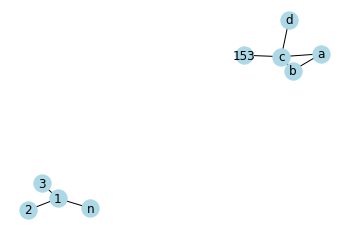

In [5]:
nx.draw_networkx(g, node_color='lightblue')
plt.axis('off')

print('Graph nodes:', g.nodes())

Вывод кратчайшего (или минимизирующего затраты) пути от одной вершины до другой:

In [6]:
# Без учёта весов.
print(nx.shortest_path(g, 'b', 'd'))

# С учётом весов: теперь за переход по каждому ребру вносится плата.
print(nx.shortest_path(g, 'b', 'd', weight='weight'))

['b', 'c', 'd']
['b', 'a', 'c', 'd']


Точно так же, как ребру приписывался численный параметр `weight`, вершине можно приписывать любые характеристики:

In [7]:
g.add_node(
    'node',
    date='06.05.2018',
    any_name='some information'
)
g.nodes['node']

{'date': '06.05.2018', 'any_name': 'some information'}

Т.е. каждый узел графа можно воспринимать как питонячий  `dict` с произвольными ключами и значениями.

Фактически весь граф это просто словарь, где ключ -- номер вершины, значение -- набор вершин, соседних к ней:

In [8]:
g.adj

AdjacencyView({1: {'n': {}, 2: {}, 3: {}}, 'n': {1: {}}, 2: {1: {}}, 3: {1: {}}, 'a': {'b': {'weight': 0.1}, 'c': {'weight': 1}}, 'b': {'a': {'weight': 0.1}, 'c': {'weight': 1.5}}, 'c': {'b': {'weight': 1.5}, 'a': {'weight': 1}, 'd': {'weight': 0.2}, 153: {'weight': 1.2}}, 'd': {'c': {'weight': 0.2}}, 153: {'c': {'weight': 1.2}}, 'node': {}})

In [9]:
g['c']

AtlasView({'b': {'weight': 1.5}, 'a': {'weight': 1}, 'd': {'weight': 0.2}, 153: {'weight': 1.2}})

Можно вывести и другое традиционное представление графа в виде матрицы смежности:

https://neerc.ifmo.ru/wiki/index.php?title=%D0%9C%D0%B0%D1%82%D1%80%D0%B8%D1%86%D0%B0_%D1%81%D0%BC%D0%B5%D0%B6%D0%BD%D0%BE%D1%81%D1%82%D0%B8_%D0%B3%D1%80%D0%B0%D1%84%D0%B0

In [10]:
nx.adjacency_matrix(g).todense()

matrix([[0. , 1. , 1. , 1. , 0. , 0. , 0. , 0. , 0. , 0. ],
        [1. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
        [1. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
        [1. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
        [0. , 0. , 0. , 0. , 0. , 0.1, 1. , 0. , 0. , 0. ],
        [0. , 0. , 0. , 0. , 0.1, 0. , 1.5, 0. , 0. , 0. ],
        [0. , 0. , 0. , 0. , 1. , 1.5, 0. , 0.2, 1.2, 0. ],
        [0. , 0. , 0. , 0. , 0. , 0. , 0.2, 0. , 0. , 0. ],
        [0. , 0. , 0. , 0. , 0. , 0. , 1.2, 0. , 0. , 0. ],
        [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ]])

Получение числа вершин графа:

In [11]:
g.number_of_nodes()

10

In [12]:
len(g)

10

Числа рёбер:

In [13]:
g.number_of_edges()

8

Совокупная информация:

In [14]:
print(nx.info(g))

Name: 
Type: Graph
Number of nodes: 10
Number of edges: 8
Average degree:   1.6000


При работе с графами часто бывает полезным получить доступ ко всем вершинам / рёбрам, что позволяет сделать метод `.nodes()` / `.edges()`:

In [15]:
g.nodes(data=True)

NodeDataView({1: {}, 'n': {}, 2: {}, 3: {}, 'a': {}, 'b': {}, 'c': {}, 'd': {}, 153: {}, 'node': {'date': '06.05.2018', 'any_name': 'some information'}})

In [16]:
g.edges(data=True)

EdgeDataView([(1, 'n', {}), (1, 2, {}), (1, 3, {}), ('a', 'b', {'weight': 0.1}), ('a', 'c', {'weight': 1}), ('b', 'c', {'weight': 1.5}), ('c', 'd', {'weight': 0.2}), ('c', 153, {'weight': 1.2})])

In [17]:
for node in g.nodes():
    print(node, g.degree(node))

1 3
n 1
2 1
3 1
a 2
b 2
c 4
d 1
153 1
node 0


## Реальные данные

Считаем данные о станциях московского метрополитена в 2014 году:

In [19]:
metro_data = pd.read_csv('metro_2014_pairwise.csv')

metro_data.head()

,End station,Start station
0,Сокольническая_Преображенская_площадь,Сокольническая_Черкизовская
1,Сокольническая_Сокольники,Сокольническая_Преображенская_площадь
2,Сокольническая_Красносельская,Сокольническая_Сокольники
3,Сокольническая_Комсомольская,Сокольническая_Красносельская
4,Сокольническая_Красные_ворота,Сокольническая_Комсомольская


Формат такой: две станции записаны в одной строке, если между ними есть перегон.

Общее число станций:

In [20]:
len(metro_data['Start station'].unique())

194

Загрузим данные в граф из подготовленной таблицы:

- вершинами будут названия станций
- ребро между двумя станциями проводится, если между станциями есть перегон

In [21]:
metro_graph = nx.from_pandas_edgelist(metro_data, source='Start station', target='End station')

# Указываем, что направление перегона между станциями нас не интересует.
# (как правило, можем поехать в обе стороны)
metro_graph = nx.to_undirected(metro_graph)

print(nx.info(metro_graph))

Name: 
Type: Graph
Number of nodes: 194
Number of edges: 229
Average degree:   2.3608


Нарисуем граф и сохраним его во внешний файл (изменение размера картинки и сохранение делается средствами matplotlib'а):

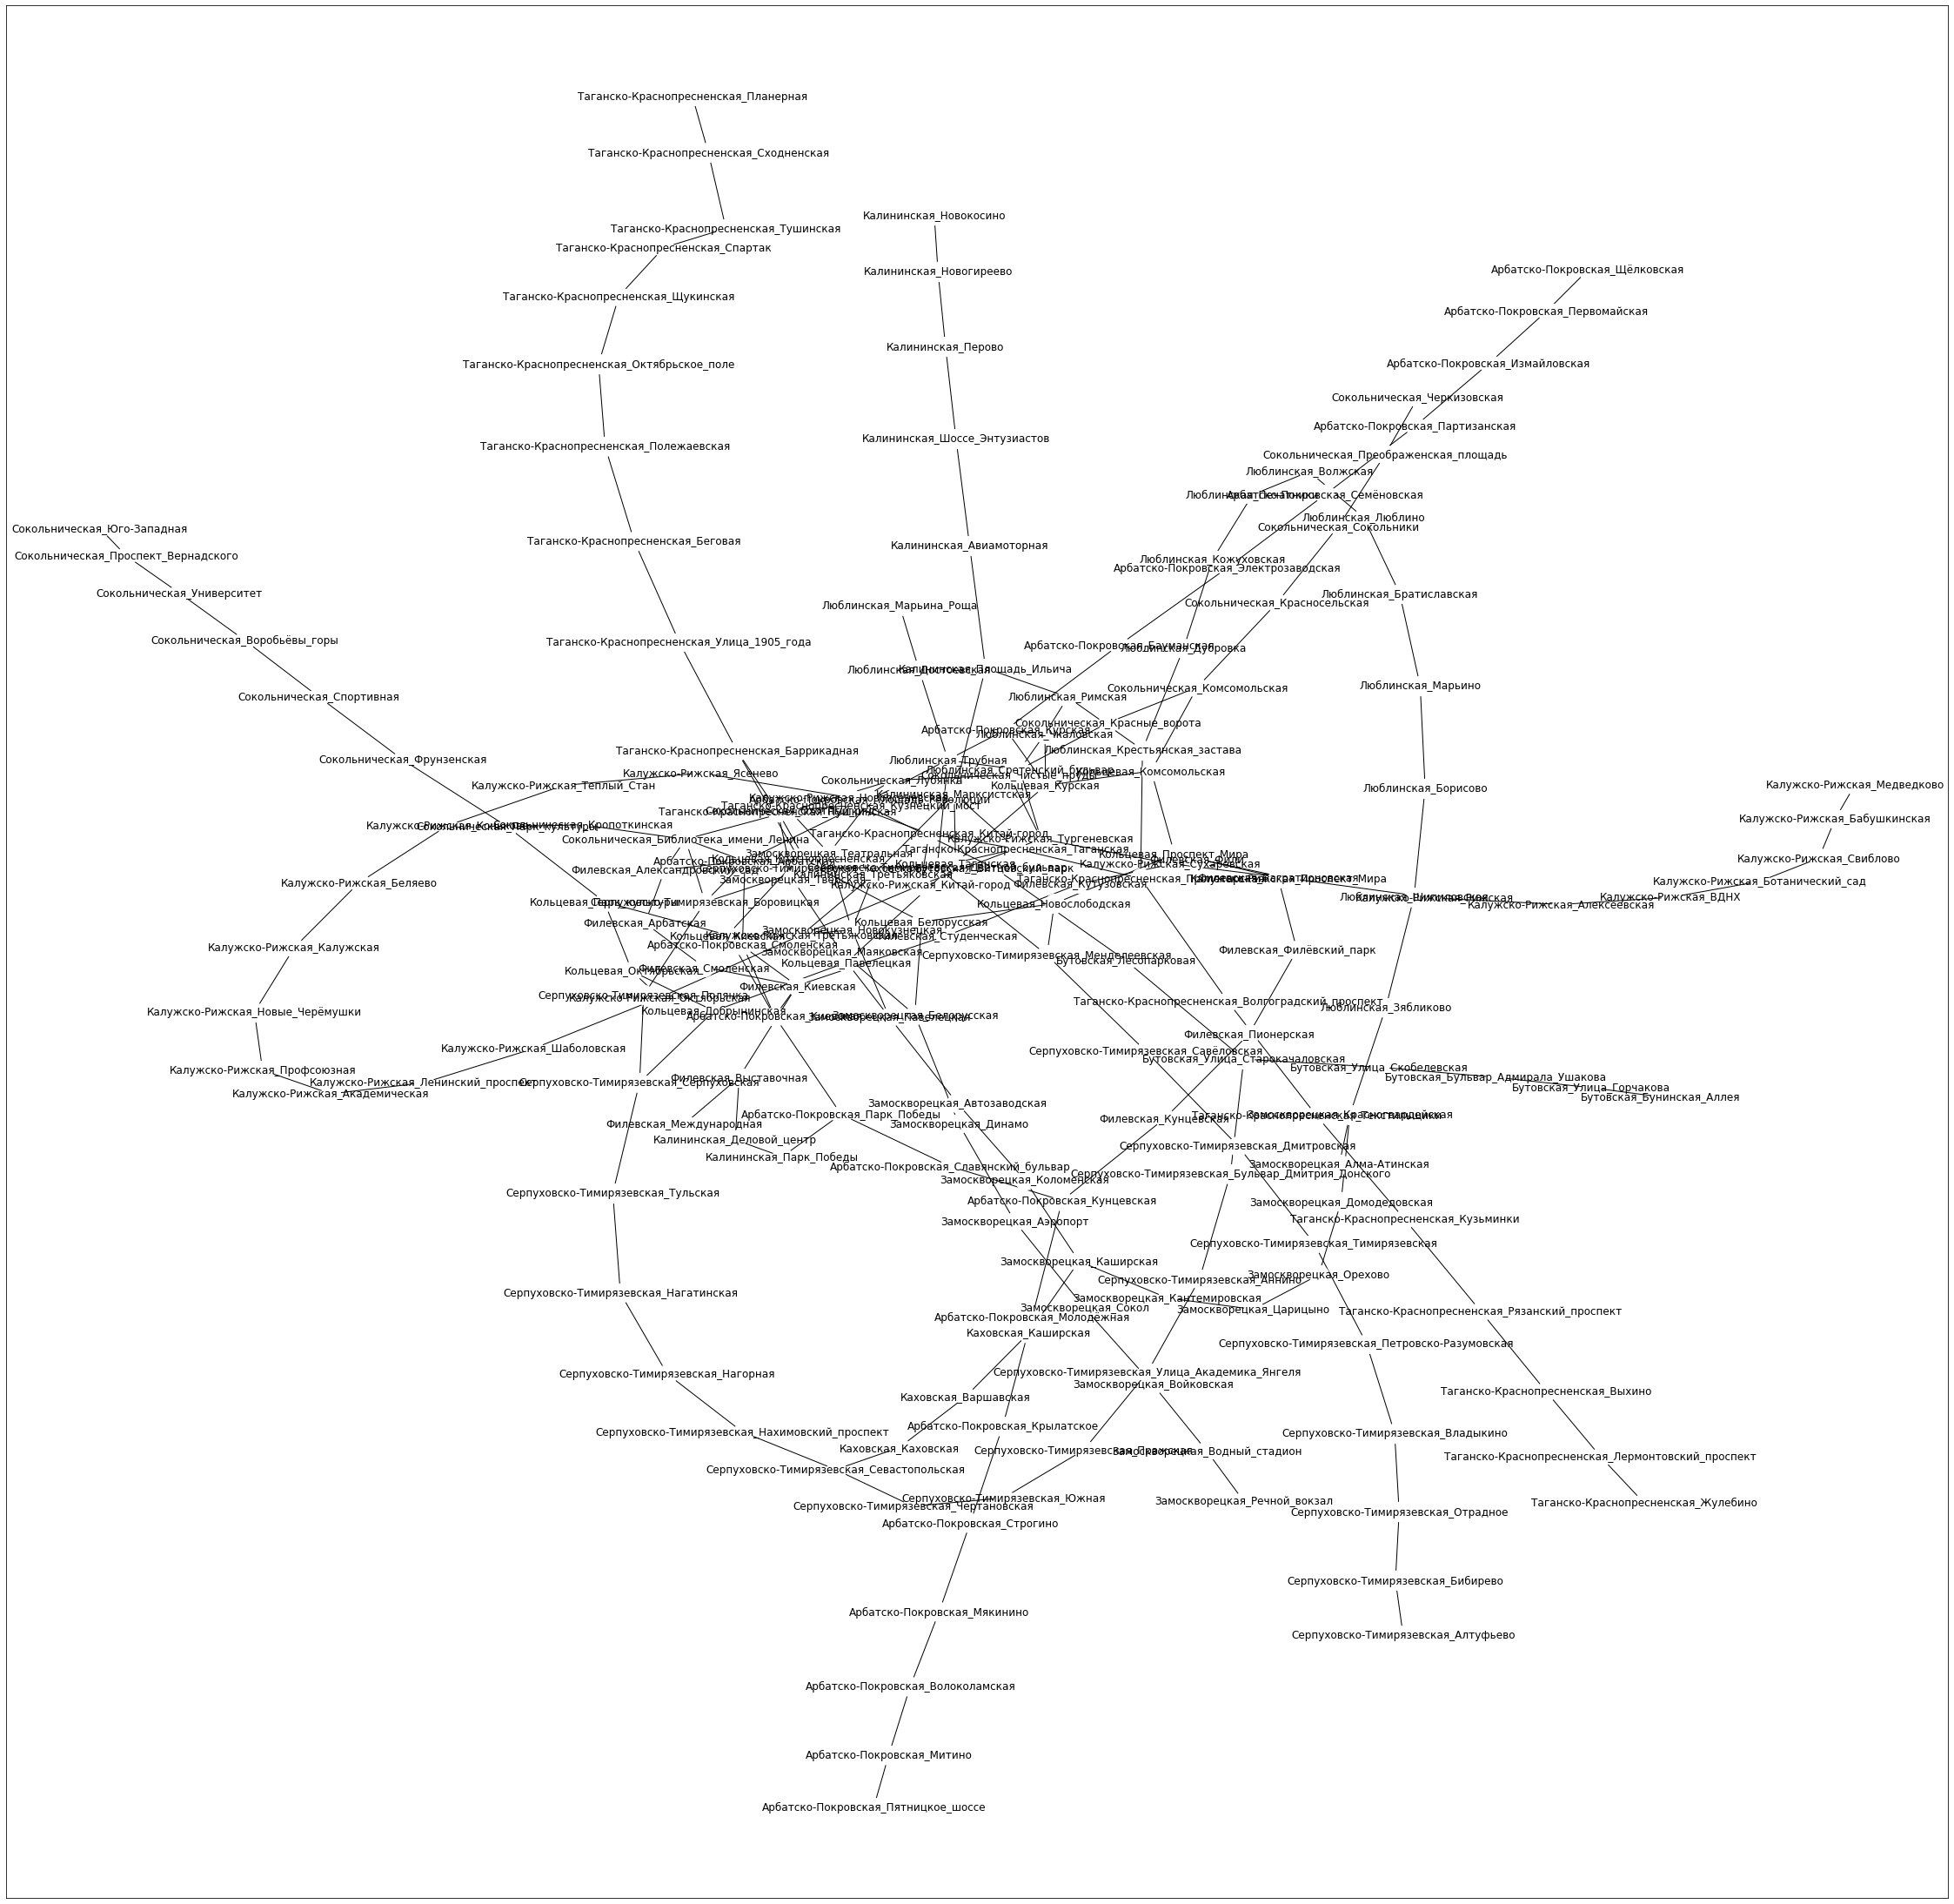

In [24]:
plt.figure(figsize=(40, 40)) 

# Можно поэкспериментировать со способом отрисовки: помимо draw_networkx есть такие:
# draw_circular, draw_spectral, draw_random, etc.
nx.draw_networkx(metro_graph, with_labels=True, node_color='white', node_size=500)

plt.savefig('metro_2014.png', bbox_inches='tight')

Все степени вершин доступны в поле `.degree`, которое похоже по структуре на словарь из пар Имя_вершины: Степень_вершины. Чтобы можно было работать, как со словарём, достаточно навесить преобразование `dict()`:

In [25]:
dict(metro_graph.degree)

{'Сокольническая_Черкизовская': 1,
 'Сокольническая_Преображенская_площадь': 2,
 'Сокольническая_Сокольники': 2,
 'Сокольническая_Красносельская': 2,
 'Сокольническая_Комсомольская': 3,
 'Сокольническая_Красные_ворота': 2,
 'Кольцевая_Комсомольская': 3,
 'Сокольническая_Чистые_пруды': 4,
 'Сокольническая_Лубянка': 3,
 'Калужско-Рижская_Тургеневская': 4,
 'Люблинская_Сретенский_бульвар': 4,
 'Сокольническая_Охотный_ряд': 3,
 'Таганско-Краснопресненская_Кузнецкий_мост': 3,
 'Сокольническая_Библиотека_имени_Ленина': 5,
 'Замоскворецкая_Театральная': 4,
 'Сокольническая_Кропоткинская': 2,
 'Арбатско-Покровская_Арбатская': 5,
 'Филевская_Александровский_сад': 3,
 'Серпуховско-Тимирязевская_Боровицкая': 4,
 'Сокольническая_Парк_культуры': 3,
 'Сокольническая_Фрунзенская': 2,
 'Кольцевая_Парк_культуры': 3,
 'Сокольническая_Спортивная': 2,
 'Сокольническая_Воробьёвы_горы': 2,
 'Сокольническая_Университет': 2,
 'Сокольническая_Проспект_Вернадского': 2,
 'Сокольническая_Юго-Западная': 1,
 'Замос

Библиотека NetworkX позволяет найти кратчайший путь между вершинами, по которому можно судить об их взаимном расположении:

In [26]:
nx.shortest_path(metro_graph, 'Сокольническая_Библиотека_имени_Ленина', 'Серпуховско-Тимирязевская_Боровицкая')

['Сокольническая_Библиотека_имени_Ленина',
 'Серпуховско-Тимирязевская_Боровицкая']

In [27]:
nx.shortest_path(metro_graph, 'Сокольническая_Библиотека_имени_Ленина', 'Серпуховско-Тимирязевская_Полянка')

['Сокольническая_Библиотека_имени_Ленина',
 'Серпуховско-Тимирязевская_Боровицкая',
 'Серпуховско-Тимирязевская_Полянка']

А ещё можно вывести кратчайшие пути до всех вершин от данной:

In [28]:
nx.single_source_shortest_path(metro_graph, 'Сокольническая_Библиотека_имени_Ленина')

{'Сокольническая_Библиотека_имени_Ленина': ['Сокольническая_Библиотека_имени_Ленина'],
 'Сокольническая_Охотный_ряд': ['Сокольническая_Библиотека_имени_Ленина',
  'Сокольническая_Охотный_ряд'],
 'Сокольническая_Кропоткинская': ['Сокольническая_Библиотека_имени_Ленина',
  'Сокольническая_Кропоткинская'],
 'Арбатско-Покровская_Арбатская': ['Сокольническая_Библиотека_имени_Ленина',
  'Арбатско-Покровская_Арбатская'],
 'Филевская_Александровский_сад': ['Сокольническая_Библиотека_имени_Ленина',
  'Филевская_Александровский_сад'],
 'Серпуховско-Тимирязевская_Боровицкая': ['Сокольническая_Библиотека_имени_Ленина',
  'Серпуховско-Тимирязевская_Боровицкая'],
 'Сокольническая_Лубянка': ['Сокольническая_Библиотека_имени_Ленина',
  'Сокольническая_Охотный_ряд',
  'Сокольническая_Лубянка'],
 'Замоскворецкая_Театральная': ['Сокольническая_Библиотека_имени_Ленина',
  'Сокольническая_Охотный_ряд',
  'Замоскворецкая_Театральная'],
 'Сокольническая_Парк_культуры': ['Сокольническая_Библиотека_имени_Ленин

Выделим некоторые кратчайшие пути цветом (при желании можно сохранить картинку, как и раньше).

In [29]:
# Функция для выделения цветом путей, пример использования ниже.
# https://github.com/jtorrents/pydata_bcn_NetworkX/blob/master/NetworkX_SNA_workshop_with_solutions.ipynb
def plot_paths(G, paths):
    plt.figure(figsize=(36, 36))
    pos = nx.fruchterman_reingold_layout(G)
    nx.draw_networkx_nodes(G, pos=pos, node_size=4000, node_color='white')
    nx.draw_networkx_labels(G, pos=pos, labels={n: n for n in G})
    # Draw edges
    nx.draw_networkx_edges(G, pos=pos)
    for path in paths:
        edges = list(zip(path, path[1:]))
        nx.draw_networkx_edges(G, pos=pos, edgelist=edges, edge_color='red', width=3)
    ax = plt.gca()
    ax.set_axis_off()
    ax.grid(None)

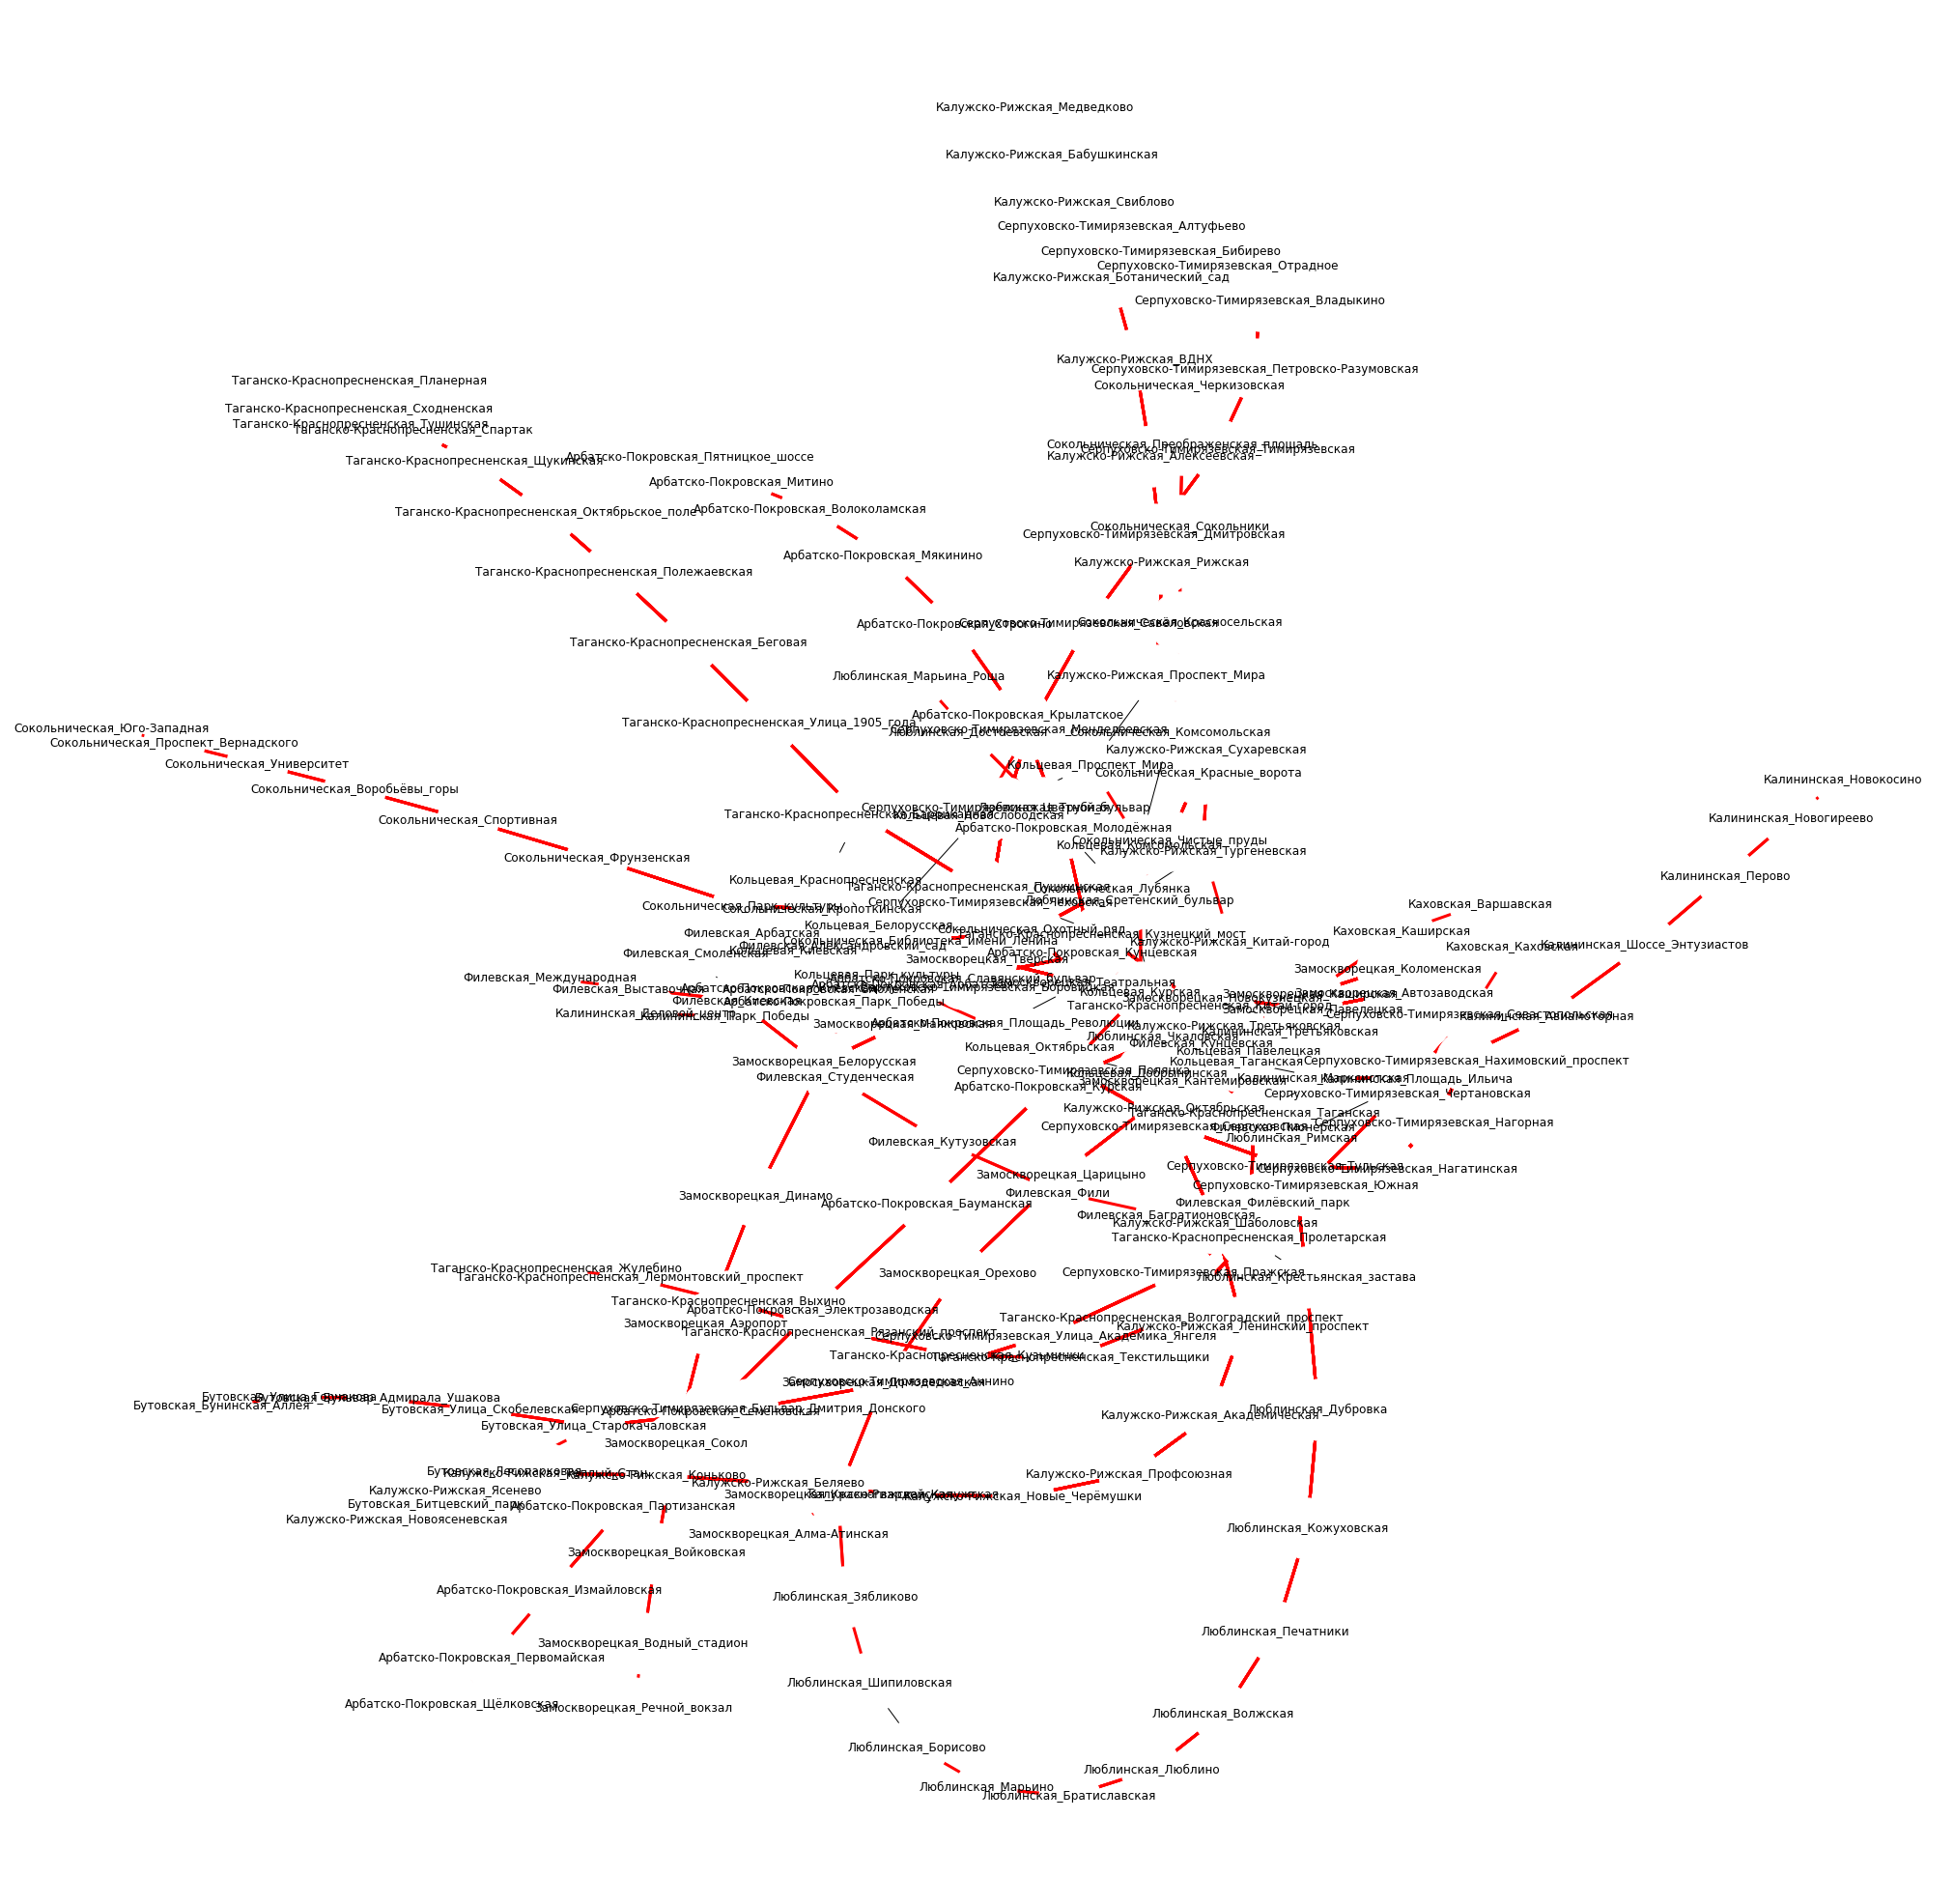

In [30]:
# Вывод кратчайших путей из одной вершины до всех остальных.
plot_paths(metro_graph, nx.single_source_shortest_path(metro_graph, 'Сокольническая_Библиотека_имени_Ленина').values())

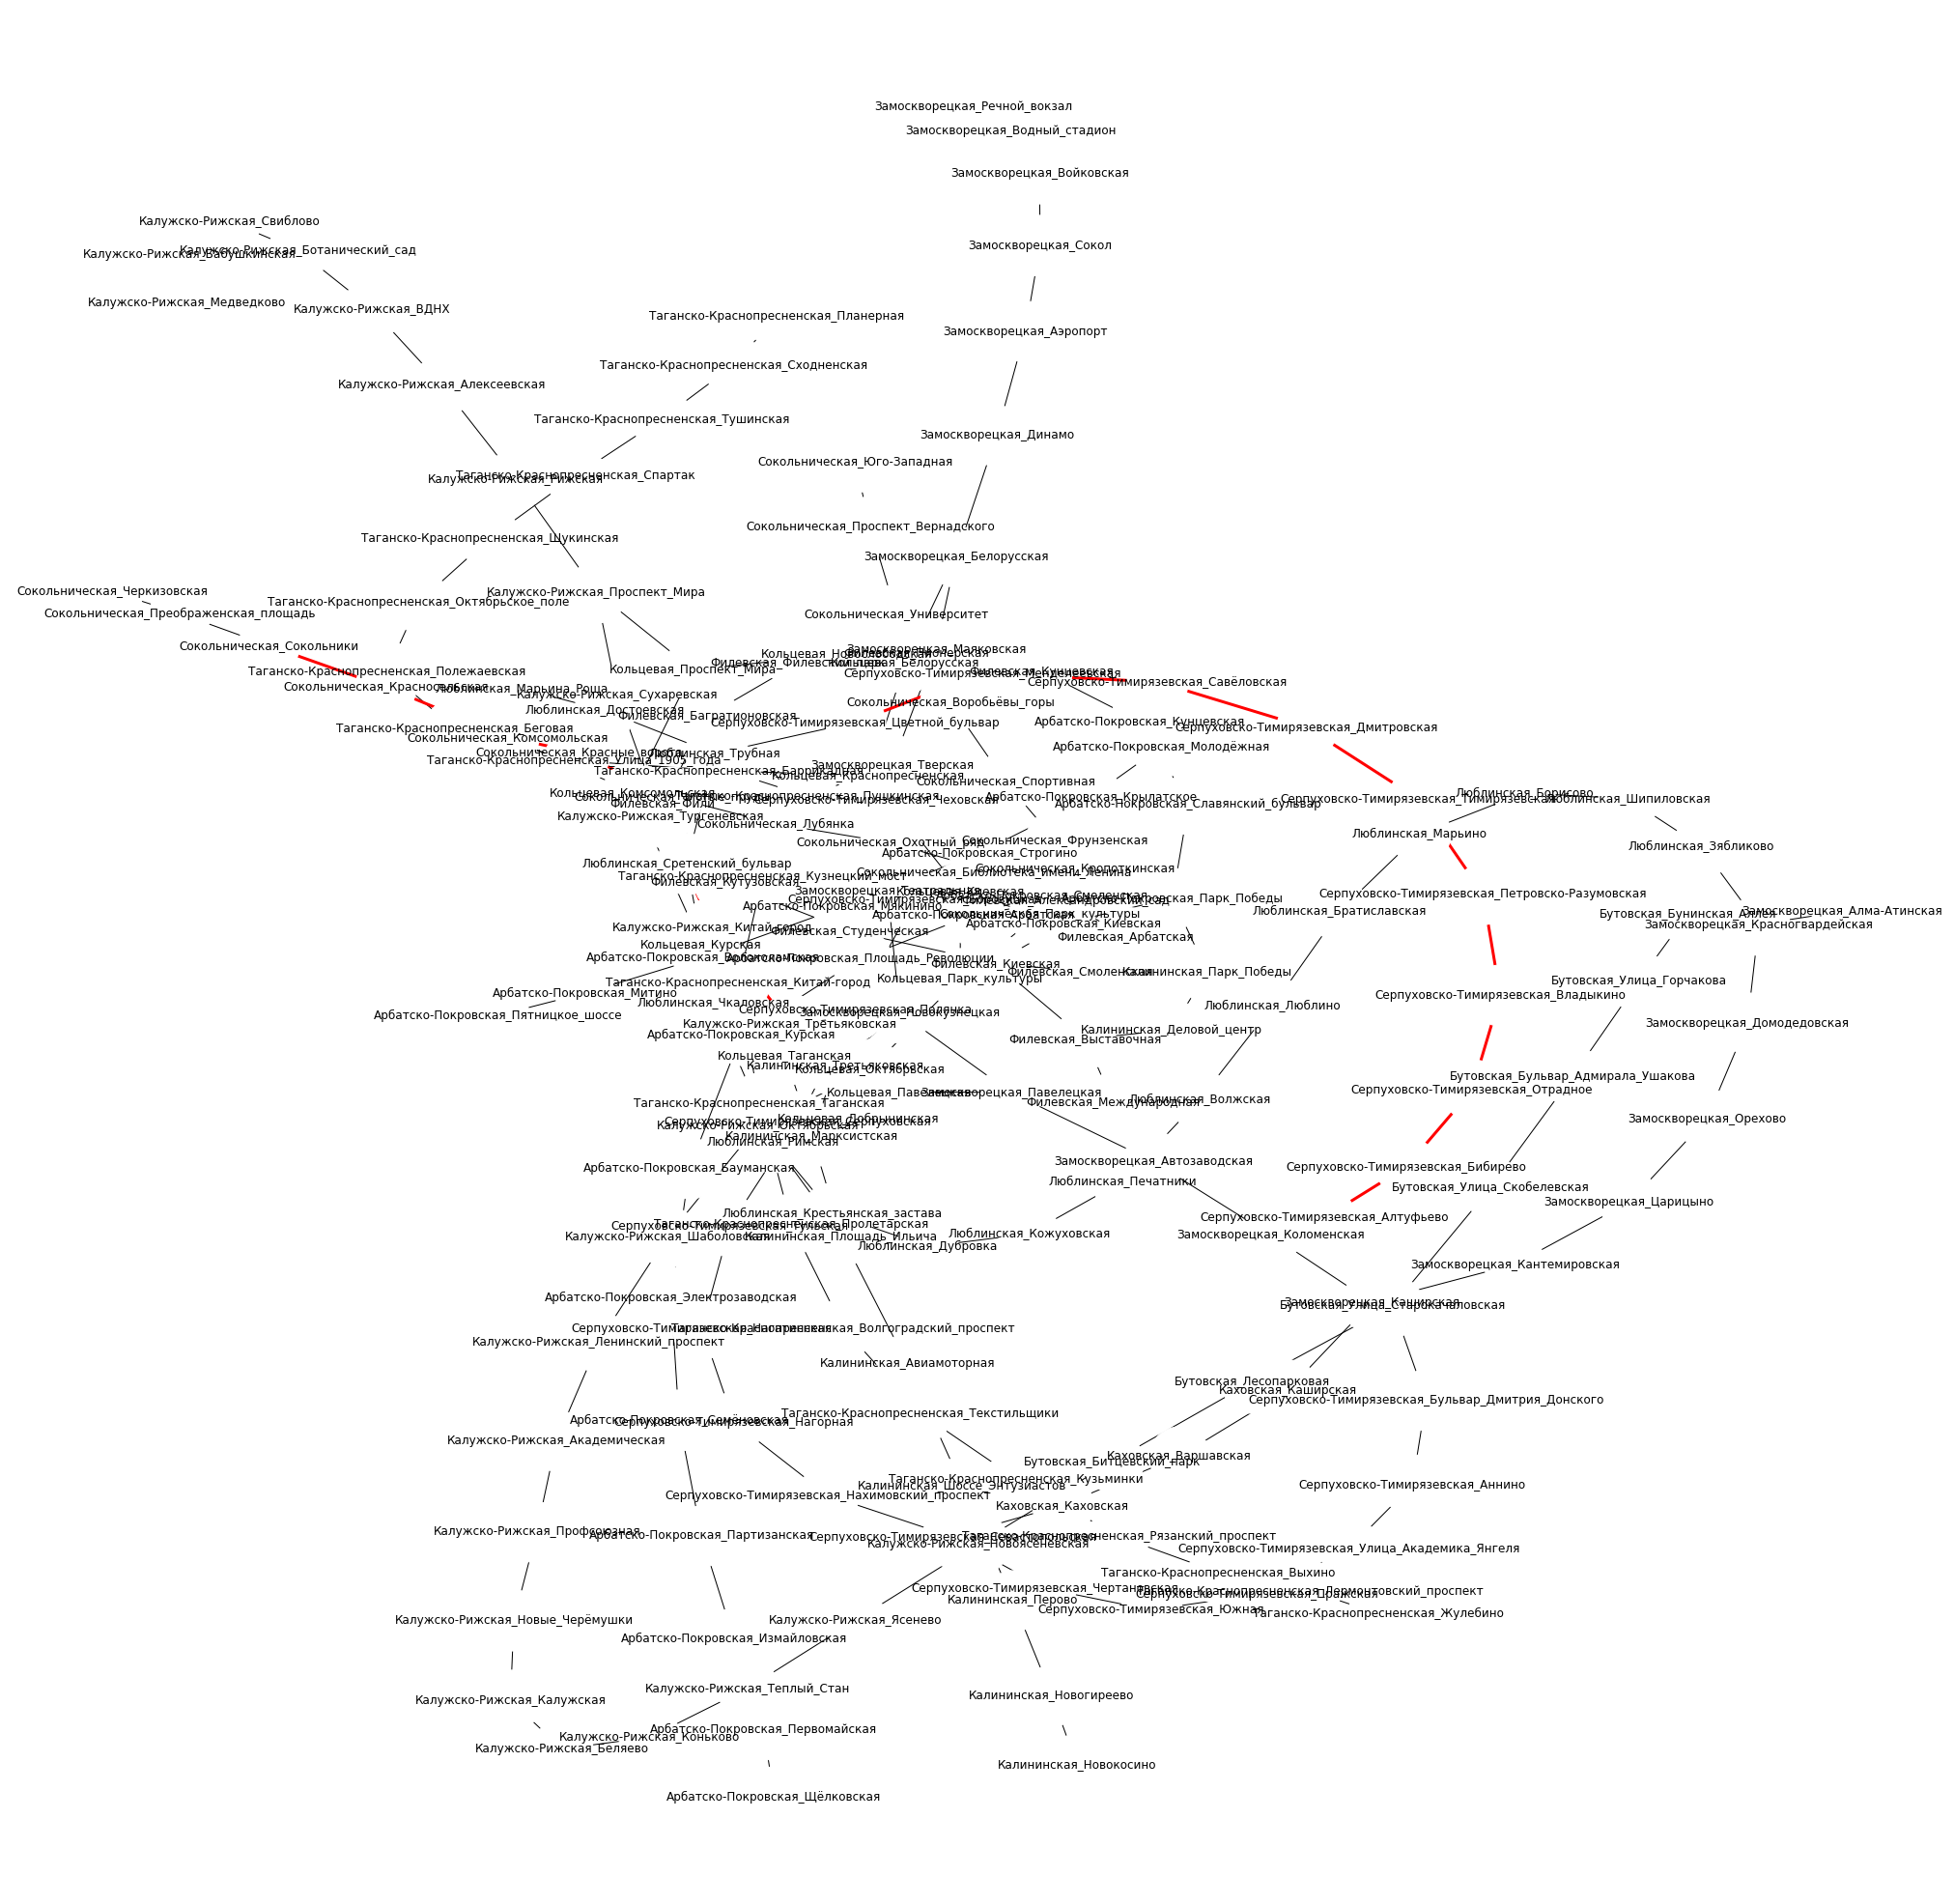

In [31]:
# Вывод нескольких кратчайших путей между конкретными парами вершин.
plot_paths(
    metro_graph,
    [
        nx.shortest_path(metro_graph, 'Сокольническая_Библиотека_имени_Ленина', 'Серпуховско-Тимирязевская_Алтуфьево'),
        nx.shortest_path(metro_graph, 'Сокольническая_Сокольники', 'Калужско-Рижская_Третьяковская')
    ]
)

### Bonus task: раскрашиваем граф метро
 можно нарисовать карту метро вот так:

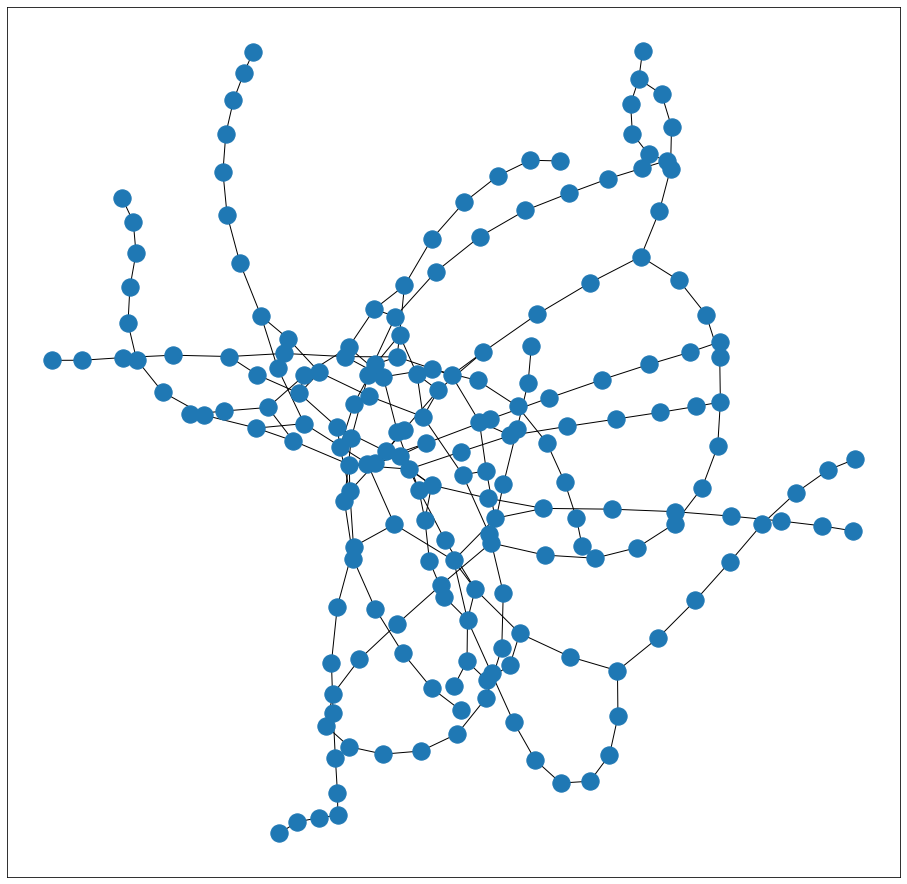

In [32]:
plt.figure(figsize=(16, 16)) 

nx.draw_networkx(metro_graph, with_labels=False)

А можно каждую вершину подкрасить цветом соответствующей ветки!

Для этого сначала создадим словарь с названиями цветов для каждой ветки (при желании поменяйте цвета на своё усмотрение, таблица с matplotlib'овскими цветами [тут](https://matplotlib.org/examples/color/named_colors)):

In [33]:
line_colors = {
    'Сокольническая': 'red',
    'Замоскворецкая': 'green',
    'Арбатско-Покровская': 'darkblue',
    'Филевская': 'blue',
    'Кольцевая': 'saddlebrown',
    'Калужско-Рижская': 'orangered',
    'Таганско-Краснопресненская': 'blueviolet',
    'Калининская': 'gold',
    'Серпуховско-Тимирязевская': 'gray',
    'Люблинская': 'lawngreen',
    'Каховская': 'palegreen',
    'Бутовская': 'lightsteelblue',
}

Ниже приведена функция, которая принимает название станции в формате `Имя-ветки_Имя-станции` (именно в таком формате хранятся названия в нашей таблице) и словарь вида `Имя-ветки: Цвет` (уже определённый `line_colors`). Функция возвращает цвет станции в соответствии с веткой, на которой она расположена.

In [34]:
def return_station_color(station, line_colors):
    for line in line_colors:
        if station.startswith(line):
            return line_colors[line]
    print('Something went wrong: couldn\'t find the line for station {}.\nReturn black color.'.format(station))
    return 'black'

Пример использования:

In [35]:
return_station_color('Калининская_Третьяковская', line_colors)

'gold'

In [36]:
return_station_color('Третьяковская', line_colors)

Something went wrong: couldn't find the line for station Третьяковская.
Return black color.


'black'

In [49]:
station_colors = ['red', 'green', 'darkblue','blue','saddlebrown','orangered', 'blueviolet', 'gold','gray', 'lawngreen', 'palegreen', 'lightsteelblue']


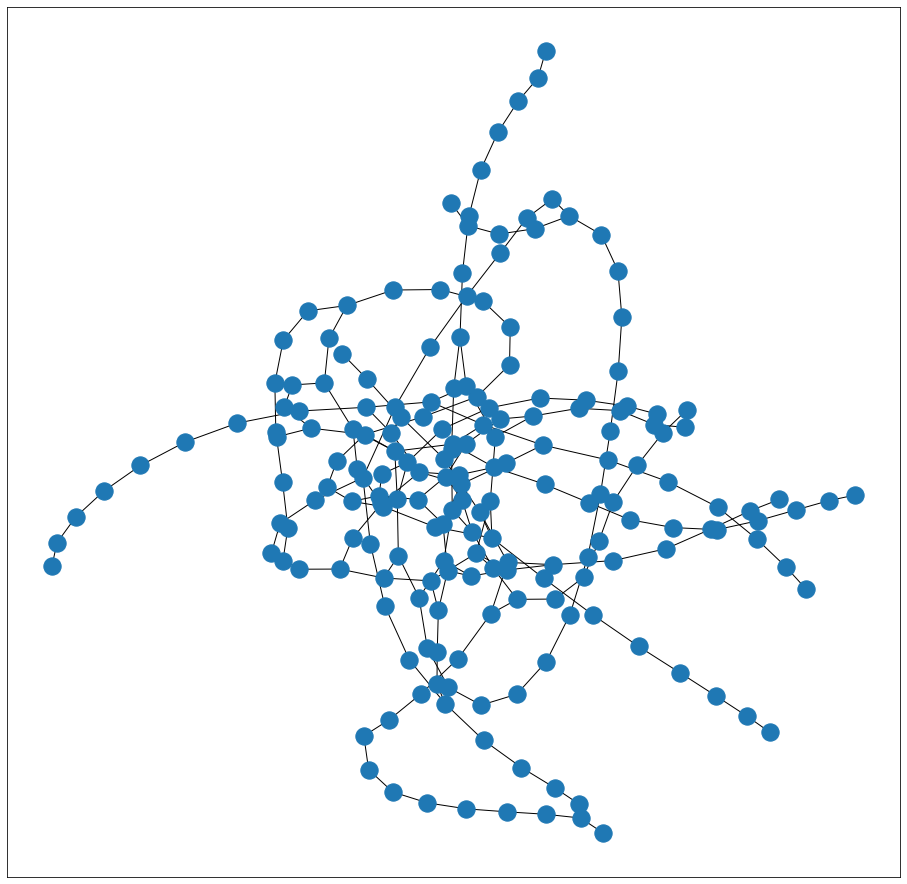

In [54]:
plt.figure(figsize=(16, 16)) 

# Опять же, можно поиграть со способами отрисовки.
nx.draw_networkx(metro_graph, with_labels=False)

## Задание  1
Создайте граф и добавьте в него $5$ вершин с городами России, у каждой должен быть атрибут (характеристика) `time_diff`, означающий временную разницу с Москвой в часах.

In [74]:
cities = nx.Graph()

In [75]:
cities.add_node(
    'Ufa',
    time_diff='2:00'
)
cities.add_node(
    'Novosibirsk',
    time_diff='4:00'
)
cities.add_node(
    'Omsk',
    time_diff='3:00'
)
cities.add_node(
    'Habarovsk',
    time_diff='7:00'
)
cities.add_node(
    'Irkutsk',
    time_diff='5:00'
)
cities.add_node(
    'Moscow',
    time_diff='0:00'
)
cities.add_node(
    'Saint_Petersburg',
    time_diff='0:00'
)
cities.nodes(data=True)

NodeDataView({'Ufa': {'time_diff': '2:00'}, 'Novosibirsk': {'time_diff': '4:00'}, 'Omsk': {'time_diff': '3:00'}, 'Habarovsk': {'time_diff': '7:00'}, 'Irkutsk': {'time_diff': '5:00'}, 'Moscow': {'time_diff': '0:00'}, 'Saint_Petersburg': {'time_diff': '0:00'}})

## Задание 2
Выберите какую-нибудь конкретную авиакомпанию (Аэрофлот, S7, Utair, etc).

В созданный граф добавьте рёбра между выбранными $5$ю городами, между которыми есть авиарейсы данной компании. У каждого ребра должны быть следующие атрибуты:
- расстояние между городами в километрах `distance`
- время перелёта в минутах `time`

При желании можно добавить в граф также несколько городов, являющихся пересадочными пунктами.

In [76]:
cities.add_edge(
    'Moscow', 
    'Ufa',
    distance = 1164 ,
    time = 135
)
cities.add_edge(
    'Moscow', 
    'Novosibirsk',
    distance = 2811 ,
    time = 250
)
cities.add_edge(
    'Moscow', 
    'Omsk',
    distance = 2235 ,
    time = 205
)
cities.add_edge(
    'Moscow', 
    'Habarovsk',
    distance = 6140 ,
    time = 465
)
cities.add_edge(
    'Moscow', 
    'Irkutsk',
    distance = 4202 ,
    time = 360
)
cities.add_edge(
    'Habarovsk', 
    'Irkutsk',
    distance = 2206 ,
    time = 220
)
cities.add_edge(
    'Habarovsk', 
    'Novosibirsk',
    distance = 3575 ,
    time = 285
)
cities.add_edge(
    'Moscow', 
    'Saint_Petersburg',
    distance = 635 ,
    time = 85
)
cities.add_edge(
    'Ufa', 
    'Saint_Petersburg',
    distance = 1631 ,
    time = 145
)
cities.add_edge(
    'Omsk', 
    'Saint_Petersburg',
    distance = 2584 ,
    time = 220
)
cities.add_edge(
    'Novosibirsk', 
    'Saint_Petersburg',
    distance = 3105 ,
    time = 280
)
cities.add_edge(
    'Irkutsk', 
    'Saint_Petersburg',
    distance = 4416 ,
    time = 360
)

In [77]:
cities.edges(data=True)

EdgeDataView([('Ufa', 'Moscow', {'distance': 1164, 'time': 135}), ('Ufa', 'Saint_Petersburg', {'distance': 1631, 'time': 145}), ('Novosibirsk', 'Moscow', {'distance': 2811, 'time': 250}), ('Novosibirsk', 'Habarovsk', {'distance': 3575, 'time': 285}), ('Novosibirsk', 'Saint_Petersburg', {'distance': 3105, 'time': 280}), ('Omsk', 'Moscow', {'distance': 2235, 'time': 205}), ('Omsk', 'Saint_Petersburg', {'distance': 2584, 'time': 220}), ('Habarovsk', 'Moscow', {'distance': 6140, 'time': 465}), ('Habarovsk', 'Irkutsk', {'distance': 2206, 'time': 220}), ('Irkutsk', 'Moscow', {'distance': 4202, 'time': 360}), ('Irkutsk', 'Saint_Petersburg', {'distance': 4416, 'time': 360}), ('Moscow', 'Saint_Petersburg', {'distance': 635, 'time': 85})])

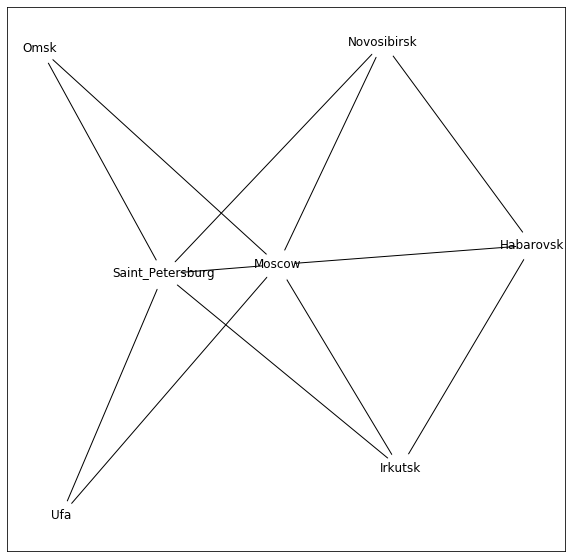

In [96]:
plt.figure(figsize=(10, 10)) 

# Можно поэкспериментировать со способом отрисовки: помимо draw_networkx есть такие:
# draw_circular, draw_spectral, draw_random, etc.
nx.draw_networkx(cities, with_labels=True, node_color='white', node_size=1000)


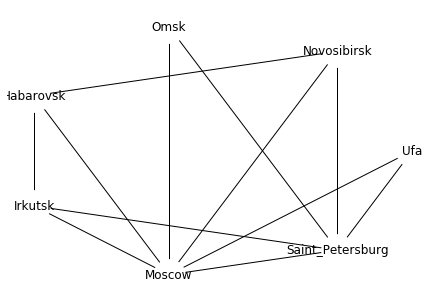

In [91]:
nx.draw_circular(cities, with_labels=True, node_color='white', node_size=1000)

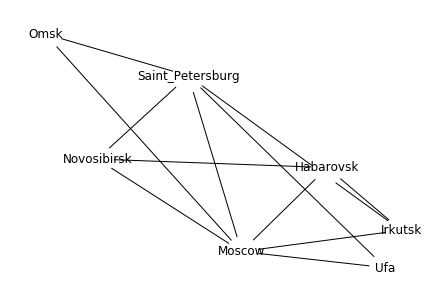

In [93]:
nx.draw_random(cities, with_labels=True, node_color='white', node_size=1000)

## Задание 3 
Выберите любую пару городов и постройте между ними следующие кратчайшие пути:
- без взвешивания
- со взвешиванием по расстоянию
- со взвешиванием по времени

In [88]:
# Без взвешивания
print(nx.shortest_path(cities, 'Ufa', 'Novosibirsk'))
print(nx.shortest_path(cities, 'Ufa', 'Habarovsk'))
print(nx.shortest_path(cities, 'Moscow', 'Habarovsk'))
print(nx.shortest_path(cities, 'Saint_Petersburg', 'Habarovsk'))

['Ufa', 'Moscow', 'Novosibirsk']
['Ufa', 'Moscow', 'Habarovsk']
['Moscow', 'Habarovsk']
['Saint_Petersburg', 'Moscow', 'Habarovsk']


In [86]:
# С учётом весов: теперь за переход по каждому ребру вносится плата.
print(nx.shortest_path(cities, 'Ufa', 'Novosibirsk', weight='distance'))
print(nx.shortest_path(cities, 'Ufa', 'Irkutsk', weight='distance'))
print(nx.shortest_path(cities, 'Saint_Petersburg', 'Habarovsk', weight='distance'))

['Ufa', 'Moscow', 'Novosibirsk']
['Ufa', 'Moscow', 'Irkutsk']
['Saint_Petersburg', 'Irkutsk', 'Habarovsk']


In [89]:
print(nx.shortest_path(cities, 'Ufa', 'Novosibirsk', weight='time'))
print(nx.shortest_path(cities, 'Ufa', 'Irkutsk', weight='time'))
print(nx.shortest_path(cities, 'Saint_Petersburg', 'Habarovsk', weight='time'))

['Ufa', 'Moscow', 'Novosibirsk']
['Ufa', 'Moscow', 'Irkutsk']
['Saint_Petersburg', 'Moscow', 'Habarovsk']
